In [1]:
using BenchmarkTools
using Plots


include("../src/Cosmojuly.jl")
import .Cosmojuly as cj

In [52]:
cj.moments_C03(1)
cj.b_max(8e-3, cj.MM17Gamma1)
cj.number_stellar_encounter(8e-3, cj.MM17Gamma1)

2357

In [ ]:
r = range(0.1, 30, 1000)
plot(r, cj.number_stellar_encounter.(1e-3 .* r, cj.MM17Gamma1))

In [ ]:
cj.velocity_dispersion_spherical(8e-3, 0.5, cj.MM17Gamma1)

In [ ]:
m_array = 10.0.^range(-7, 1.80, 100)
plot(m_array, cj.stellar_mass_function_C03.(m_array), yscale=:log10, xscale=:log10)

In [ ]:

#σ = cj.velocity_dispersion_spherical(8e-3, 0.5, cj.MM17Gamma1)
#vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)
v_array = 10.0.^range(7.710588749443367e-6, log10(7*σ), 200)
plot(v_array, cj.pdf_relative_speed.(v_array, σ, vstar), xscale=:log10)

In [ ]:
import Unitful: km, s, Gyr, K, Myr, NoUnits
import UnitfulAstro: Mpc, Gpc, Msun
import PhysicalConstants.CODATA2018: c_0, G as G_NEWTON


#σ = cj.velocity_dispersion_spherical(8e-3, 0.5, cj.MM17Gamma1)
#vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)


b_m = cj.b_max(8e-3, cj.MM17Gamma1)
G_N = G_NEWTON * Msun / (km^2 * Mpc) * s^2 |> NoUnits 

v_max = 10^(1.80) * 2 * G_N / u / b_m
v_min = 1e-5 * 2 * G_N / u / b_m

println(v_min, " ", v_max)

v_array = 10.0.^range(log10(v_min), log10(v_max), 1000)
res = cj.stellar_mass_function_C03.((v_array * u * b_m)/(2*G_N)) .* cj.pdf_relative_speed.(v_array, σ, vstar) .* v_array
plot(v_array[res .> 0], res[res .> 0], yscale=:log10, xscale=:log10)


In [86]:
import Unitful: km, s, Gyr, K, Myr, NoUnits
import UnitfulAstro: Mpc, Gpc, Msun
import PhysicalConstants.CODATA2018: c_0, G as G_NEWTON

#σ = cj.velocity_dispersion_spherical(8e-3, cj.MM17Gamma1)
#vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)
mstar_avg = cj.moments_C03(1)
v_avg     = 1.0/cj.average_inverse_relative_speed(σ, vstar)

η_array = 10.0.^range(-5, 3, 100)
#res = cj.cdf_η.(η_array, σ, vstar, mstar_avg, v_avg, cj.MM17Gamma1)
#plot(η_array[res .> 0], res[res .> 0], xscale=:log10)
println(cj.inverse_cdf_η(0.999999999, σ, vstar, mstar_avg, v_avg, cj.MM17Gamma1))

#y_array = 10.0.^range(-8, -0.00000001, 500)
#res = cj.inverse_cdf_η.(y_array, σ, vstar, mstar_avg, v_avg, cj.MM17Gamma1)
#plot(y_array[res .> 0], res[res .> 0], xscale=:log10, yscale=:log10)

1053.3908421016679


In [162]:
cj._save_inverse_cdf_η(8e-3, cj.MM17Gamma1)

true

## Monte Carlo on total the velocity kick

### General expressions

The velocity kick felt by a particle at position $\bf r$ inside a subhalo of tidal radius $r_t$ from an encounter with a star of mass $m_\star$ at speed $v$ and with an impact parameter $\bf b$ is

\begin{equation}
\delta {\bf v} = \left(\frac{2Gm_\star}{vb}\right) \left\{ b\frac{({\bf r} \cdot {\bf \hat e}_v){\bf \hat e}_v -  {\bf r} - {\bf b} }{r^2 - ({\bf r} \cdot {\bf \hat e}_v)^2 + b^2 + 2{\bf r}\cdot {\bf b}} + I(b, r_{\rm t}){\bf \hat e}_b  \right\}
\end{equation}
To simplify the expression we can decompose the fixed vector ${\bf r}$ as
\begin{equation}
{\bf r} = r (\cos \psi {\bf \hat e}_v + \sin \psi (\cos \varphi {\bf \hat n}_1 + \sin \varphi {\bf \hat n}_2) \quad {\rm with} \quad ({\bf \hat e}_v, {\bf \hat n}_1, {\bf \hat n}_2) \text{~an orthonormal basis}
\end{equation}
and we can do the Monte Carlo analysis for various values of $r$, $\psi$ and $\varphi$. Moreover we can now write ${\bf b}$ according to ${\bf \hat n}_1$ and ${\bf \hat n}_2$  as
\begin{equation}
{\bf b} = b (\cos \theta {\bf \hat n}_1 + \sin \theta {\bf \hat n}_2 )
\end{equation}
We can now write the component of $\delta {\bf v}$ alongside the two new basis vectors (note that $\delta {\bf v}$ is perpendicular to ${\bf \hat e}_v$)
\begin{equation}
\delta {v}_1 \equiv \delta {\bf v} \cdot {\bf \hat n}_1 = \left(\frac{2Gm_\star}{v_rb}\right) \left\{I(b, r_{\rm t}) \cos \theta - \frac{rb\sin \psi \cos \varphi + b^2 \cos \theta}{r^2\sin^2\theta_r + b^2 + 2rb\sin\psi\cos(\theta - \varphi )}\right\}
\end{equation}
and
\begin{equation}
\delta {v}_2 \equiv \delta {\bf v} \cdot {\bf \hat n}_2 = \left(\frac{2Gm_\star}{vb}\right) \left\{I(b, r_{\rm t}) \sin \theta - \frac{rb \sin\psi \sin\varphi + b^2 \sin \theta}{r^2\sin^2\theta_r + b^2 + 2rb\sin\psi\cos(\theta - \varphi) }\right\} \, .
\end{equation}
For a Monte Carlo run we fix $r_{\rm t}$, and $r \sin\psi < r_{\rm t}$. We then draw $v$, $b$, $m_\star$ and $\theta$ from their own distributions a number $\mathcal{N}_\star$ and finally sum the two velocity components. Eventually we do as much realisation as possible of a run to get enough statistics. The fact that the answer does not depend on $\cos \psi$ is due to the symmetry of the problem. By introducing $r_\psi = r \sin \psi$ we can further simplify
\begin{equation}
\delta {v}_1 = \left(\frac{2Gm_\star}{vb}\right) \left\{I(b, r_{\rm t}) \cos \theta - b\frac{r_\psi \cos \varphi + b \cos \theta}{r_\psi^2 + b^2 + 2r_\psi b\cos(\theta-\varphi)}\right\}
\end{equation}
and 
\begin{equation}
\delta {v}_2 = \left(\frac{2Gm_\star}{vb}\right) \left\{I(b, r_{\rm t}) \sin \theta - b\frac{ r_\psi \sin \varphi +  b \sin \theta}{r_\psi^2 + b^2 + 2r_\psi b\cos(\theta - \varphi)}\right\} \, .
\end{equation}


### Complex expression

To simpligy these expression we first introduce

\begin{equation}
\delta {w}_1 = I(b, r_{\rm t}) \cos \theta - b\frac{r_\psi \cos \varphi + b \cos \theta}{r_\psi^2 + b^2 + 2r_\psi b\cos(\theta-\varphi)}
\end{equation}
and 
\begin{equation}
\delta {w}_2 = I(b, r_{\rm t}) \sin \theta - b\frac{ r_\psi \sin \varphi +  b \sin \theta}{r_\psi^2 + b^2 + 2r_\psi b\cos(\theta - \varphi)} \, .
\end{equation}

We further define 
\begin{equation}
z = r_\psi e^{-i\varphi} + b e^{-i\theta}
\end{equation}
We then have
\begin{equation}
\begin{split}
z\bar z & = \left(r_\psi e^{-i\varphi} + b e^{-i\theta} \right)\left(r_\psi e^{+i\varphi} + b e^{+i\theta} \right) \\
& = r_\psi^2 + b^2 + r_\psi b \left(e^{-i\varphi}e^{+i\theta} + e^{-i\theta}e^{+i\varphi}\right) \\
& =  r_\psi^2 + b^2 + 2r_\psi b  \cos(\theta - \varphi)
\end{split}
\end{equation}

\begin{equation}
\begin{split}
z + \bar z & = \left(r_\psi e^{-i\varphi} + b e^{-i\theta} \right) + \left(r_\psi e^{+i\varphi} + b e^{+i\theta} \right) \\
& = r_\psi\left( e^{+i\varphi} + e^{-i\varphi} \right) + b\left(e^{+i\theta} + e^{-i\theta}\right) \\ 
& =  2r_\psi \cos \varphi  + 2 b \cos \theta
\end{split}
\end{equation}

\begin{equation}
\begin{split}
\bar z - z & = \left(r_\psi e^{+i\varphi} + b e^{+i\theta} \right) - \left(r_\psi e^{-i\varphi} + b e^{-i\theta} \right) \\
& = r_\psi\left( e^{+i\varphi} - e^{-i\varphi} \right) + b\left(e^{+i\theta} - e^{-i\theta}\right) \\ 
& =  2ir_\psi \sin \varphi  + 2i b \sin \theta
\end{split}
\end{equation}

Therefore we can write
\begin{equation}
\begin{split}
\delta {w}_1 & = I(b, r_{\rm t}) \cos \theta - \frac{b}{2}\frac{z  + \bar z}{z \bar z} \\
\delta {w}_2 & = I(b, r_{\rm t}) \sin \theta - \frac{b}{2i}\frac{\bar z  - z}{z \bar z}
\end{split}
\end{equation}
Once simplified this yields
\begin{equation}
\begin{split}
\delta {w}_1 & = I(b, r_{\rm t}) \cos \theta - \frac{b}{2}\left(\frac{1}{z} + \frac{1}{\bar z} \right) \\
\delta {w}_2 & = I(b, r_{\rm t}) \sin \theta - \frac{b}{2i}\left(\frac{1}{z} -  \frac{1}{\bar z} \right) 
\end{split}
\end{equation}

We not introduce the complex number $\delta w = \delta w_1 + i\delta w_2$. it can be written
\begin{equation}
\delta w =  I(b, r_{\rm t})e^{i\theta} - \frac{b}{z}
\end{equation}
Inserting back the expressions of $r_\psi$ we have
\begin{equation}
\delta w = \left[I(b, r_{\rm t}) - \frac{b}{r_\psi e^{i(\theta-\varphi)}+b} \right]e^{i\theta}
\end{equation}

-------------------

For the rest of the discussion we will introduce
\begin{equation}
\delta v_0 = \frac{2G \overline{m_\star}}{\overline{v} b_{\rm max}} \quad {\rm and} \quad \eta = \frac{m_\star}{\overline{m_\star}} \frac{\overline{v}}{v} 
\end{equation}
that has dimension of a velocity. Therefore, in complex notations
\begin{equation}
\begin{split}
\delta v & = \delta v_0 \frac{b_{\rm max}}{b}  \eta  \delta w \\
\end{split}
\end{equation}
The total velocity kick after $N$ encounters is
\begin{equation}
\Delta v = \delta v_0 b_{\rm max} \sum_{j=1}^{N}\left\{ \eta_j e^{i\theta_j}   \left[\frac{1}{b_j}I(b_j, r_{\rm t}) - \frac{1}{r_\psi e^{i(\theta_j -\varphi)}+b_j} \right] \right\}
\end{equation}
In terms of dimensionles variables we can define $z = r_\psi e^{-i\varphi} / r_{\rm s} = x \sin \psi e^{i\varphi}$, $\beta = b/r_{\rm s}e^{-i\theta}$ and
\begin{equation}
\mathcal{I}(\beta, x_{\rm t}) = \frac{I( |\beta|  r_{\rm s} , x_{\rm t} r_{\rm s})}{\beta}
\end{equation}
therefore it reduces to
\begin{equation}
\Delta v(z) = \delta v_0 \frac{b_{\rm max}}{r_s} \sum_{j=1}^{N}  \eta_j  \left[\mathcal{I}(\beta_j, x_{\rm t}) - \frac{1}{z + \beta_j} \right] 
\end{equation}

From the previous expression we can write down a probability distribution for both quantities knowing $b$ and $r_\parallel$. First we write down an expression for the probability of $X$
\begin{equation}
p_u(u) = \frac{b_{\rm max}}{2G}\int p_{m_\star}\left(\frac{vub_{\rm max}}{2G}\right) p_v(v) v {\rm d} v
\end{equation}
The probability distribution on $\delta v_\parallel$ and $\delta v_\perp$ are therefore
\begin{equation}
\begin{split}
p_{\delta v_\parallel}(\delta v_\parallel \, | \, b, r_\parallel) & =  \frac{b}{2\pi} \int p_X\left(\frac{b \delta v_\parallel}{w_\parallel(b, \theta_b, r_\parallel)}\right) \frac{1}{w_\parallel(b, \theta_b, r_\parallel)}{\rm d} \theta_b \\
p_{\delta v_\perp}(\delta v_\perp \, | \, b, r_\parallel) & =  \frac{b}{2\pi} \int p_X\left(\frac{b \delta v_\perp}{w_\perp(b, \theta_b, r_\parallel)}\right) \frac{1}{w_\perp(b, \theta_b, r_\parallel)}{\rm d} \theta_b 
\end{split}
\end{equation}
assuming that $\theta_b$ is uniformely distributed.

In [ ]:
subhalo = cj.halo_from_mΔ_and_cΔ(cj.nfwProfile, 1e-4, 40)
rt = cj.jacobi_radius(8e-3, subhalo, cj.MM17Gamma1)
r_array = 10.0.^range(-5, log10(rt / subhalo.rs ), 200) * subhalo.rs 

plot(r_array / subhalo.rs, cj.escape_velocity.(r_array, rt, subhalo), xscale=:log10)


In [258]:
import Base.Threads: nthreads
println("Number of threads used: ", nthreads())

using BenchmarkTools
using Plots

include("../src/Cosmojuly.jl")
import .Cosmojuly as cj

Number of threads used: 4


In [343]:
subhalo = cj.halo_from_mΔ_and_cΔ(cj.nfwProfile, 1e-4, 40)
rt = cj.jacobi_radius(8e-3, subhalo, cj.MM17Gamma1)

x_array = collect(range(0.1 * rt / subhalo.rs, 0.9999 * rt / subhalo.rs, 20))
ψ_array = collect(range(0, π/2, 20))
φ_array = collect(range(0, 2*π, 4))

dw = cj.draw_velocity_kick_complex(x_array, ψ_array, φ_array, subhalo, 8e-3, nrep=10000, nmem=10000);

nx = length(x_array) 
nψ = length(ψ_array)
nφ = length(φ_array)

┌ Info: nturn
│   nturn = 1251
└ @ Main.Cosmojuly.StellarEncounters /Users/gaetanfacchinetti/Documents/work/codes/env_DarkUniverse/Cosmojuly.jl/src/StellarEncounters.jl:247


4

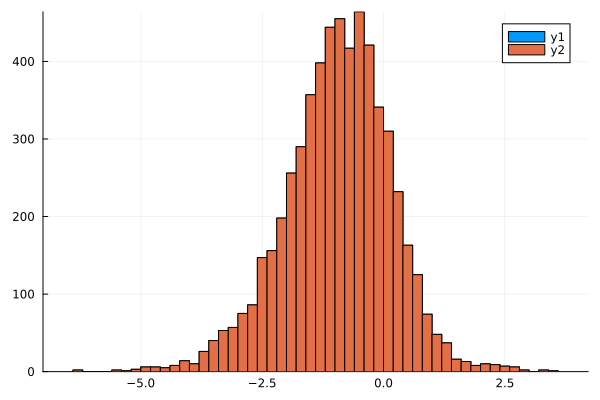

In [344]:
dv = abs.(dw)
histogram([log10.(dv[1, 1, 2, :]), log10.(dv[1, 1, 1, :])], density=true)

In [30]:
subhalo = cj.halo_from_mΔ_and_cΔ(cj.nfwProfile, 1e-4, 40)
rt = cj.jacobi_radius(8e-3, subhalo, cj.MM17Gamma1)
r_array = collect(range(- 0.9999 * rt / subhalo.rs, 0.9999 * rt / subhalo.rs, 100))
dwx, dwy = cj.draw_velocity_kick(r_array, subhalo, 8e-3, nrep = 10000, nmem=1000000)

┌ Info: nturn
│   nturn = 12
└ @ Main.Cosmojuly.StellarEncounters /Users/gaetanfacchinetti/Documents/work/codes/env_DarkUniverse/Cosmojuly.jl/src/StellarEncounters.jl:181


([44.96445356023109 2.3174217853329466 … -182.80652873140104 108.06527890570669; 44.478572880551354 2.790951461378856 … -179.7733532014435 106.89888359642109; … ; -35.463155008385385 10.456193692354566 … 162.6206788052591 -383.8333481851706; -35.16860638303505 10.213831071488201 … 168.93095522868126 -381.9251249410619], [144.07281001230595 -49.81345865915518 … -8.656500081502141 119.02979520489723; 141.62960469084067 -48.14319941616723 … -7.899018187312922 117.55990756854699; … ; -71.64345892607285 61.781983787425084 … -99.94836147455162 1.1523402326265382; -72.26802461429472 63.55555564917149 … -105.07949120605623 6.735103024992352])

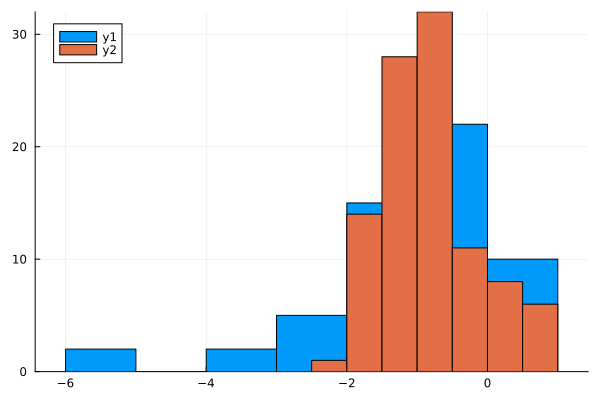

In [56]:
dv = sqrt.(real.(dw).^2 + imag.(dw).^2)
histogram([log10.(dv[1, 1, 1, :]), log10.(dv[1, 2, 1, :])], density=true)

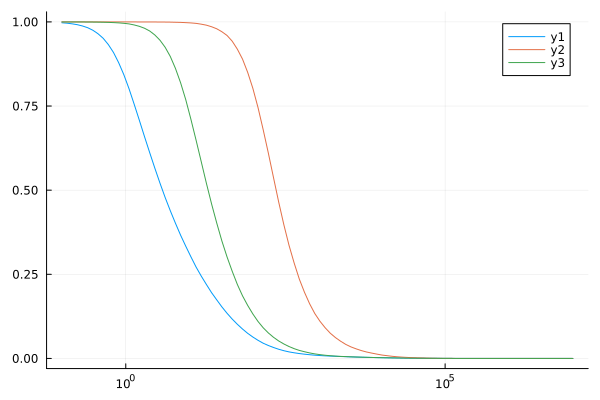

In [29]:
dv = sqrt.(dvx.^2 + dvy.^2)

dv_array   = 10.0.^range(-1, 7, 100)

inv_cumulative1 = [length(dv[1, dv[1, :] .> _dv]) for _dv in dv_array] ./ size(dv)[2]
inv_cumulative2 = [length(dv[end, dv[end, :] .> _dv]) for _dv in dv_array] ./ size(dv)[2]
inv_cumulative3 = [length(dv[5, dv[5, :] .> _dv]) for _dv in dv_array] ./ size(dv)[2]

#length(dv[1, dv[1, :] .< dv_array[end]])

plot(dv_array, inv_cumulative1, xscale=:log10)
plot!(dv_array, inv_cumulative2, xscale=:log10)
plot!(dv_array, inv_cumulative3, xscale=:log10)

In [208]:
import Unitful: km, s, Gyr, K, Myr, NoUnits
import UnitfulAstro: Mpc, Gpc, Msun
import PhysicalConstants.CODATA2018: c_0, G as G_NEWTON


σ = cj.velocity_dispersion_spherical(8e-3, cj.MM17Gamma1)
vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)
mstar_avg = cj.moments_C03(1)
v_avg     = 1.0/cj.average_inverse_relative_speed(σ, vstar)

dv0 = 2*G_NEWTON * mstar_avg * Msun / (v_avg * km /s)  / (subhalo.rs * Mpc) / (km/s) |> NoUnits

0.00022214135631017025

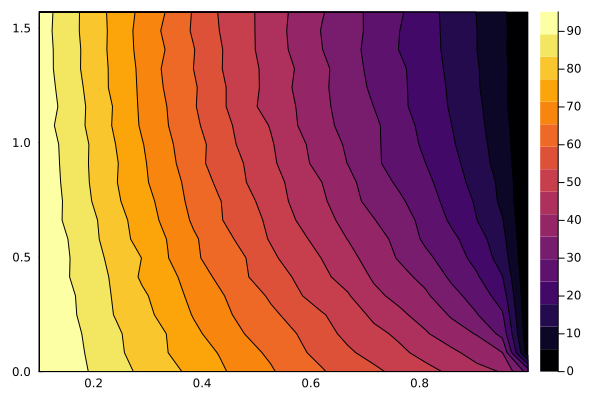

In [347]:

sigma = cj.velocity_dispersion.(x_array * subhalo.rs, rt, subhalo)
v_esc = cj.escape_velocity.(x_array * subhalo.rs, rt, subhalo)

nrep = size(dw)[4]

vx = randn(size(dw))
vy = randn(size(dw))
vz = randn(size(dw))

for i in 1:nx
    vx[i, :, :, :] = vx[i, :, :, :] * sigma[i]
    vy[i, :, :, :] = vy[i, :, :, :] * sigma[i]
    vz[i, :, :, :] = vz[i, :, :, :] * sigma[i]
end


v_end = @. sqrt((vx + dv0 * real(dw))^2 + (vy + dv0 * imag(dw))^2 +  vz^2)

tf_bound = Array{Float64, 3}(undef, nx, nψ, nφ)
ρ_new = Array{Float64, 3}(undef, nx, nψ, nφ)

for i in 1:nx
    for j in 1:nψ
        for k in 1:nφ
            tf_bound[i, j, k] = count(x-> x < v_esc[i], v_end[i, j, k, :])/nrep * 100
            ρ_new[i, j, k] = cj.ρ_halo(x_array[i] * subhalo.rs, subhalo) * tf_bound[i,j,k]
        end
    end
end

#percentage_bound

#println(count(x-> x < v_esc[1], v_end[10, 3, 10, :])/nrep * 100)
#println(count(x-> x < v_esc[1], v_end[10, 3, 1, :])/nrep * 100)
contourf(x_array / rt * subhalo.rs, ψ_array, tf_bound[:, :, 1]')

plot()

#println(percentage_bound[9, 9, :])

#histogram([log10.(v_end[1, 1, 1, :]), log10.(v_end[1, 1, 10, :])], density=true)

In [40]:
#σ = cj.velocity_dispersion_spherical(8e-3, cj.MM17Gamma1)
#vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)
B = cj.draw_parameter_B(8e-3, σ, vstar, nstars = cj.number_stellar_encounter(8e-3, cj.MM17Gamma1) * cj.number_circular_orbits(8e-3, 0, cj.MM17Gamma1))

average velocity = 264.80074146256277 km/s | mstat_avg = 0.16793833797642496


51832-element Vector{Float64}:
 5.679460950594214e-20
 7.610253139338151e-19
 3.344876351350558e-19
 2.871236918726677e-19
 6.305841903673266e-20
 4.6808345189046075e-20
 1.613257938255146e-19
 3.2229580907531135e-20
 2.9088855390922464e-20
 2.668414588717963e-18
 ⋮
 1.0165019757523338e-19
 3.018835691184338e-20
 3.8925654024050985e-19
 1.810154208465635e-20
 1.62125729897396e-20
 2.225729138029712e-19
 6.857904057849731e-20
 2.629034719848046e-19
 1.7719531704334993e-19

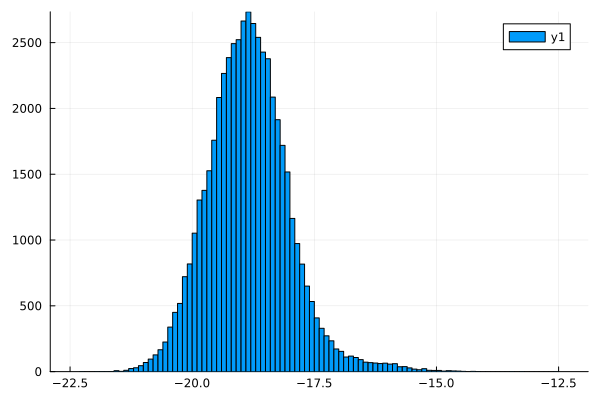

In [41]:
histogram(log10.(B), density=true)

In [43]:
cj.number_circular_orbits(8e-3, 0, cj.MM17Gamma1)

44